# Imports

In [51]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
from src.utils.db.database import Database 
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd 

# Loading data

In [52]:
def import_data():
    # Connecting to MySQL
    palworld_database = mysql.connector.connect(
        host="localhost",
        user="root",
        password="root",
        database="palworld_database" 
    )
    cursor = palworld_database.cursor()

    # Importing the dataset
    cursor.execute("SELECT volume_size, genus_category, rarity, element_1, element_2 FROM pals")  
    dataset = cursor.fetchall()

    # Closing the connection
    cursor.close()
    palworld_database.close()

    return dataset


# Creating an instance of the Database class
db = Database(user='root', password='root', host='localhost', database='palworld_database')


# About volume size of Pals 

## Percentage distribution of number of Pals by volume size :

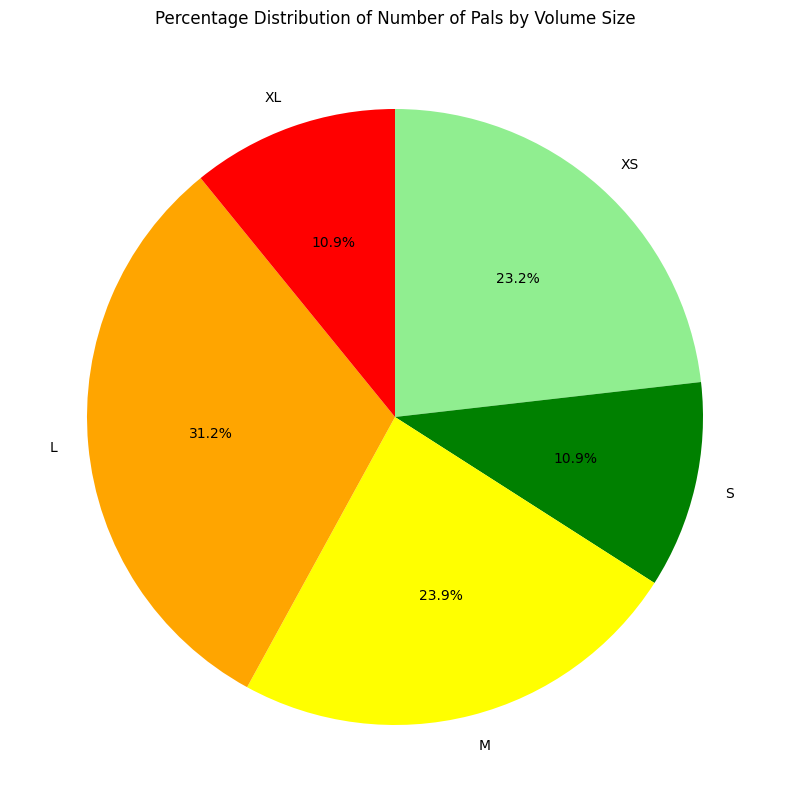

In [53]:
# Function to plot the distribution of number of pals by volume size and genus category
def volume_size_distribution_pie():
    # Importing the dataset
    dataset = import_data()

    # Extracting volume_size from the dataset
    volume_size = [row[0] for row in dataset]  # row[0] because we only have one column

    # Creating a dictionary to count the frequency of each volume size
    volume_size_freq = {}
    for size in volume_size:
        if size in volume_size_freq:
            volume_size_freq[size] += 1
        else:
            volume_size_freq[size] = 1

    # Defining color gradient
    colors = {'XS': 'lightgreen', 'S': 'green', 'M': 'yellow', 'L': 'orange', 'XL': 'red'}

    # Ordering the sizes in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    volume_size_freq = {size: volume_size_freq.get(size, 0) for size in sizes_order}  # Use get() to avoid KeyError
    
    # Creating a larger figure
    plt.figure(figsize=(10, 10))
    
    # Plotting the pie chart
    plt.pie(volume_size_freq.values(), labels=volume_size_freq.keys(), autopct='%1.1f%%', startangle=90, colors=[colors[size] for size in volume_size_freq.keys()], counterclock=False)
    plt.title('Percentage Distribution of Number of Pals by Volume Size')
    plt.show()

# Calling the functions
volume_size_distribution_pie()

### Report :
The distribution of Pals by volume size varies considerably. 

* The **L** category is the most represented with **31.2%** of Pals, indicating that the majority of Pals have a relatively large volume size. 

    * This could be due to a number of factors, such as players’ preference for larger-sized Pals or the increased availability of these Pals in the game.

* The **XS** and **M** categories follow closely, with **23.2%** and **23.9%** of Pals respectively. 
    * This suggests that a significant proportion of Pals also have smaller or medium volume sizes. 
        * It would be interesting to examine in more detail why these sizes are also popular. For example, **XS** and **M** sized Pals might have specific capabilities or attributes that make them attractive to players.

* Finally, the **S** and **XL** categories are the least represented, each with **10.9%** of Pals. 
    * This could indicate that these volume sizes are less common or less preferred by players. 
        * It might be useful to investigate further the reasons for this distribution.

*Overall, these statistics provide an interesting overview of the distribution of volume sizes among Pals. However, for a more comprehensive analysis, it would be useful to have additional data, such as the specific attributes of Pals in each size category, player preferences, and how these factors might influence the observed distribution.*






## Distribution of number of Pals by volume size and genus category :

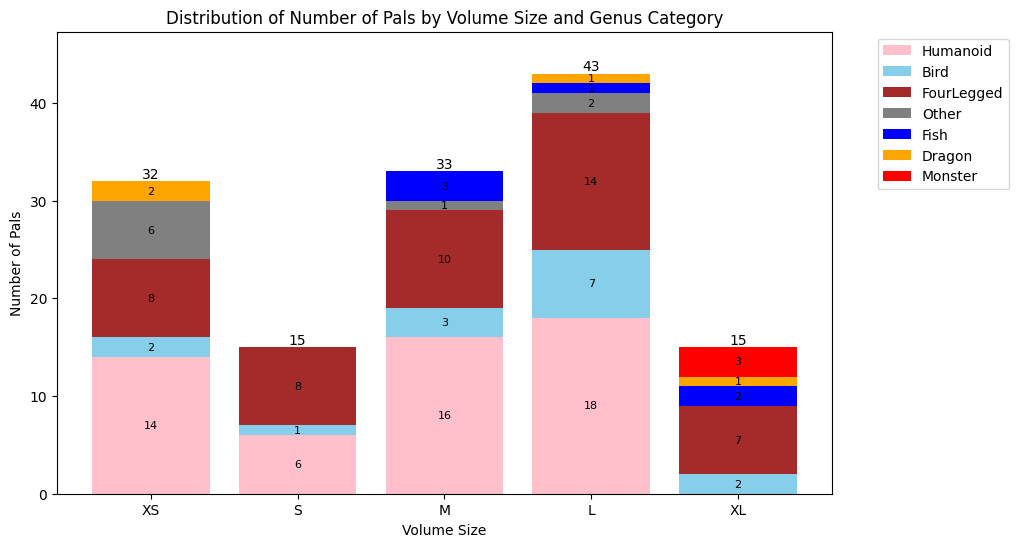

In [54]:
# Function to plot the distribution of number of pals by volume size and genus category
def volume_size_distribution_genus_bar():
    # Importing the dataset
    dataset = import_data()

    # Extracting volume_size and genus_category from the dataset
    volume_size = [row[0] for row in dataset]  # row[0] because we only have one column
    genus_category = [row[1] for row in dataset]  # assuming genus_category is in row[1]

    # Creating a dictionary to count the frequency of each volume size for each genus category
    volume_size_freq = {}
    for i in range(len(volume_size)):
        size = volume_size[i]
        category = genus_category[i]
        if size not in volume_size_freq:
            volume_size_freq[size] = {}
        if category in volume_size_freq[size]:
            volume_size_freq[size][category] += 1
        else:
            volume_size_freq[size][category] = 1

    # Defining color gradient for genus category
    colors = {'Humanoid': 'pink', 'Bird': 'skyblue', 'FourLegged': 'brown', 'Other': 'gray', 'Fish': 'blue', 'Dragon': 'orange', 'Monster': 'red'}

    # Ordering the sizes and categories in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']

    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(sizes_order))
    for category in categories_order:
        values = [volume_size_freq[size].get(category, 0) for size in sizes_order]
        bars = ax.bar(sizes_order, values, bottom=bottom, color=colors[category])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='black', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(sizes_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Volume Size')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Volume Size and Genus Category')
    ax.legend(categories_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the functions
volume_size_distribution_genus_bar()

### Report :

| **VOLUME SIZE** | **TOTAL NUMBER OF PALS BY VOLUME SIZE** | **DRAGON**              | **OTHER**               | **FOURLEGGED**           | **BIRD**                | **HUMANOID**             | **MONSTER**          | **FISH**                | 
|-----------------|--------------------------|-------------------------|-------------------------|--------------------------|-------------------------|--------------------------|----------------------|-------------------------|
| **XS**          | 32                       |  2 PALS, WHICH IS **6.25%** | 6 PALS, WHICH IS **18.75%** | 8 PALS, WHICH IS **25%**     | 2 PALS, WHICH IS **6.25%**  | 14 PALS, WHICH IS **43.75%** | -                    | -                       |      
| **S**           | 15                       | -                       | -                       | 8 PALS, WHICH IS **53.33%**  | 1 PAL, WHICH IS **6.67%**   | 6 PALS, WHICH IS **40%**     | -                    | -                       |      
| **M**           | 33                       | -                       | 1 PAL, WHICH IS **3.03%**   | 10 PALS, WHICH IS **30.3%**  | 3 PALS, WHICH IS **9.09%**  | 16 PALS, WHICH IS **48.48%** | -                    | 3 PALS, WHICH IS **9.09%**  |      
| **L**           | 43                       | 1 PAL, WHICH IS **2.33%**   | 2 PALS, WHICH IS **4.65%**  | 14 PALS, WHICH IS **32.56%** | 7 PALS, WHICH IS **16.28%** | 18 PALS, WHICH IS **41.86%** | -                    | 1 PAL, WHICH IS **2.33%**   |      
| **XL**          | 15                       | 1 PAL, WHICH IS **6.67%**   | -                       | 7 PALS, WHICH IS **46.67%**  | 2 PALS, WHICH IS **13.33%** | -                        | 3 PALS, WHICH IS **20%** | 2 PALS, WHICH IS **13.33%** |      
   

* **XS**: This size is dominated by Humanoid Pals, which make up 43.75% of this category. FourLegged and Other Pals are also well represented with 25% and 18.75% respectively. 
   * This could indicate that players prefer small-sized Pals with humanoid or various features.
* **S**: FourLegged Pals dominate this category with 53.33%, followed by Humanoid Pals at 40%. 
   * This could suggest that for slightly larger Pals, players prefer animal-like features.
* **M**: Humanoid Pals are the most numerous with 48.48%, followed by FourLegged Pals at 30.3%. 
   * This could indicate a preference for medium-sized Pals with humanoid features, but also an appreciation for animal-like features.
* **L**: Humanoid Pals are the most represented with 41.86%, closely followed by FourLegged Pals at 32.56%. 
   * This could indicate a preference for large-sized Pals with humanoid features, but also an appreciation for animal-like features.
* **XL**: This category is dominated by FourLegged Pals at 46.67%, followed by Monster Pals at 20%. 
   * This could suggest that for very large Pals, players prefer more monstrous or animal-like features.

*In summary, it seems that Humanoid Pals are generally preferred in all sizes, except for XL size where FourLegged and Monster Pals are more common. This could indicate that players prefer Pals that resemble humans for smaller sizes, while for larger sizes, they prefer Pals with more animal-like or monstrous features. It would be interesting to explore in more detail the reasons for these preferences.*


## Distribution of number of Pals by volume size and rarity category :

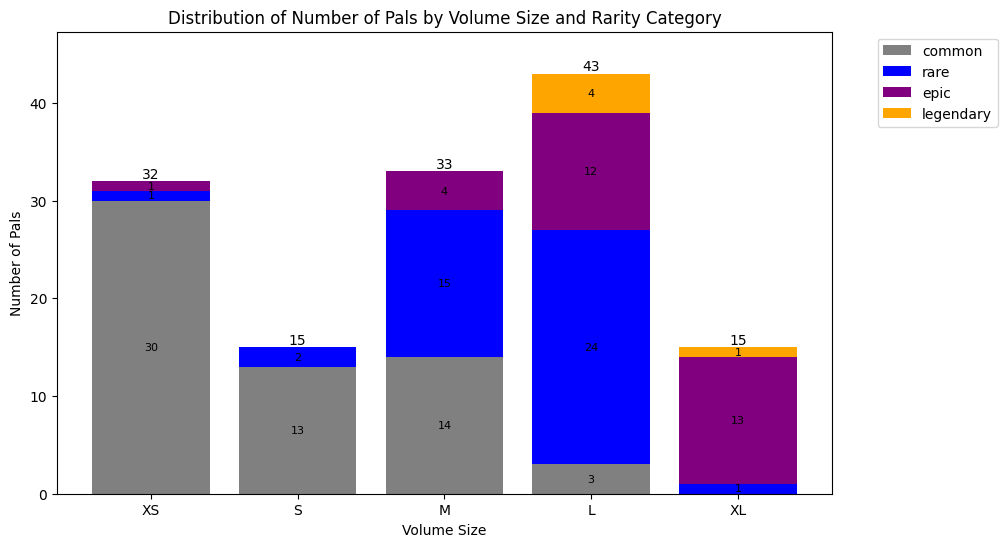

In [55]:
# Function to plot the distribution of number of pals by volume size and rarity category (1 to 4 = common, 5 to 7 = rare, 8 to 10 = epic and 10+ = legendary)
def volume_size_distribution_rarity_bar():
    # Importing the dataset
    dataset = import_data()

    # Extracting volume_size and rarity from the dataset
    volume_size = [row[0] for row in dataset]  # row[0] because we only have one column
    rarity = [row[2] for row in dataset]  # assuming rarity is in row[2]

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in rarity:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Creating a dictionary to count the frequency of each volume size for each rarity category
    volume_size_freq = {}
    for i in range(len(volume_size)):
        size = volume_size[i]
        category = rarity_categories[i]
        if size not in volume_size_freq:
            volume_size_freq[size] = {}
        if category in volume_size_freq[size]:
            volume_size_freq[size][category] += 1
        else:
            volume_size_freq[size][category] = 1

    # Defining color gradient for rarity category
    colors = {'common': 'gray', 'rare': 'blue', 'epic': 'purple', 'legendary': 'orange'}

    # Ordering the sizes and categories in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    categories_order = ['common', 'rare', 'epic', 'legendary']

    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(sizes_order))
    for category in categories_order:
        values = [volume_size_freq[size].get(category, 0) for size in sizes_order]
        bars = ax.bar(sizes_order, values, bottom=bottom, color=colors[category])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='black', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(sizes_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Volume Size')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Volume Size and Rarity Category')
    ax.legend(categories_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the functions
volume_size_distribution_rarity_bar()

### Report :

| **VOLUME SIZE** | **TOTAL NUMBER OF PALS** | **COMMON (1 to 4)**       | **RARE (5 to 7)**        | **EPIC (8 to 10)**       | **LEGENDARY (10+)**    | 
|-----------------|--------------------------|---------------------------|--------------------------|------|------|
| **XS**          | 32                       | 30 PALS, WHICH IS 93.75%  | 1 PALS, WHICH IS 3.125%  | 1 PALS, WHICH IS 3.125%  | -                      |      |      |      |      |
| **S**           | 15                       | 13 PALS, WHICH IS 86.67%  | 2 PALS, WHICH IS 13.33%  | -                        | -                      |      |      |      |      |
| **M**           | 33                       | 14 PALS, WHICH IS 42.42%  | 15 PALS, WHICH IS 45.45% | 4 PALS, WHICH IS 12.12%  | -                      |      |      |      |      |
| **L**           | 43                       | 3 PALS, WHICH IS 6.98%    | 24 PALS, WHICH IS 55.81% | 12 PALS, WHICH IS 27.91% | 4 PALS, WHICH IS 9.30% |      |      |      |      |
| **XL**          | 15                       | -                         | 1 PALS, WHICH IS 6.67%   | 13 PALS, WHICH IS 86.67% | 1 PALS, WHICH IS 6.67% |      |      |      |      |


* **XS**: Out of 32 Pals, the majority are common (93.75%), with one epic Pal (3.125%) and one rare Pal (3.125%).
    * This could indicate that small-sized Pals are generally common, with a few rare and epic exceptions.
* **S**: Out of 15 Pals, the majority are common (86.67%), with two rare Pals (13.33%).
    * This could suggest that slightly larger Pals are mainly common, but with a notable presence of rare Pals.
* **M**: Out of 33 Pals, the distribution is more balanced with 45.45% rare Pals, 42.42% common Pals, and 12.12% epic Pals.
    * This could indicate a diversity of rarity for medium-sized Pals.
* **L**: Out of 43 Pals, the majority are rare (55.81%), followed by epic Pals (27.91%) and legendary Pals (9.30%). Only 3 Pals are common (6.98%).
    * This could indicate a preference for large-sized Pals with rare, epic, or legendary features.
* **XL**: Out of 15 Pals, the majority are epic (86.67%), with one legendary Pal (6.67%) and one rare Pal (6.67%).
    * This could suggest that for very large Pals, players prefer epic features, with a few rare and legendary exceptions.

*In summary, it seems that common Pals are generally preferred for smaller sizes, while for larger sizes, rare, epic, and legendary Pals are more common. This could indicate that players prefer more common Pals for smaller sizes, while for larger sizes, they prefer Pals with rarer or epic features. It would be interesting to explore in more detail the reasons for these preferences.*

## Summary of the analysis of Pals distribution by volume size : 

* **Volume Size Distribution** : The majority of Pals fall into the Large (L) category, making up 31.2% of the total. The Extra Small (XS) and Medium (M) categories follow closely, each representing around 23% of the total. The Small (S) and Extra Large (XL) categories are the least represented, each making up 10.9% of the total.
* **Genus Category** : Humanoid Pals are generally preferred across all sizes, except for the XL size where FourLegged and Monster Pals are more common. This suggests that players prefer Pals that resemble humans for smaller sizes, while for larger sizes, they prefer Pals with more animal-like or monstrous features.
* **Rarity Category** : Common Pals are generally preferred for smaller sizes (XS and S), while for larger sizes (M, L, and XL), rare, epic, and legendary Pals are more common. This could indicate that players prefer more common Pals for smaller sizes, while for larger sizes, they prefer Pals with rarer or epic features.

**In conclusion** : the analysis shows that players’ preferences for Pals vary significantly depending on the volume size, genus, and rarity categories. Further research could explore the reasons behind these preferences, such as specific capabilities or attributes of Pals in each category, and how these factors might influence the observed distribution.





# About Pals genus categories 

## Percentage distribution of number of Pals by genus category :

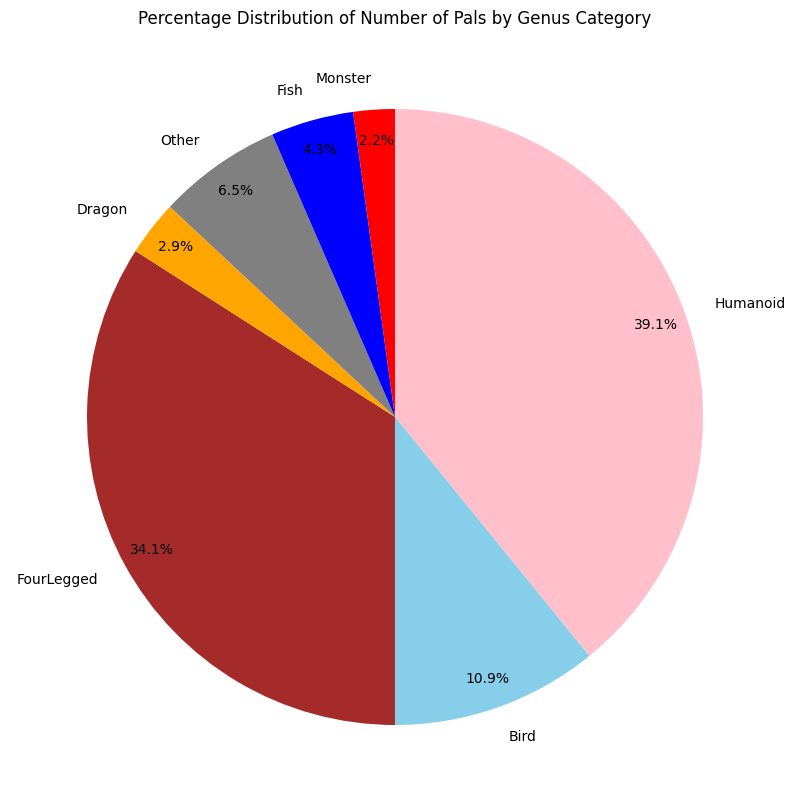

In [56]:
# Function to plot the distribution of pals genius category
def genus_category_distribution_pie():
    # Importing the dataset
    dataset = import_data()

    # Extracting genus_category from the dataset
    genus_category = [row[1] for row in dataset]  # assuming genus_category is in row[1]

    # Creating a dictionary to count the frequency of each genus category
    genus_category_freq = {}
    for category in genus_category:
        if category in genus_category_freq:
            genus_category_freq[category] += 1
        else:
            genus_category_freq[category] = 1

    # Defining color gradient
    colors = {'Humanoid': 'pink', 'Bird': 'skyblue', 'FourLegged': 'brown', 'Other': 'gray', 'Fish': 'blue', 'Dragon': 'orange', 'Monster': 'red'}
    
    # Creating a larger figure
    plt.figure(figsize=(10, 10))
    
    # Plotting the pie chart
    plt.pie(genus_category_freq.values(), labels=genus_category_freq.keys(), autopct='%1.1f%%', pctdistance=0.9, startangle=90, colors=[colors[category] for category in genus_category_freq.keys()], counterclock=False)
    plt.title('Percentage Distribution of Number of Pals by Genus Category')
 
    plt.show()

# Calling the functions
genus_category_distribution_pie()

## Distribution of number of Pals by genus category and rarity

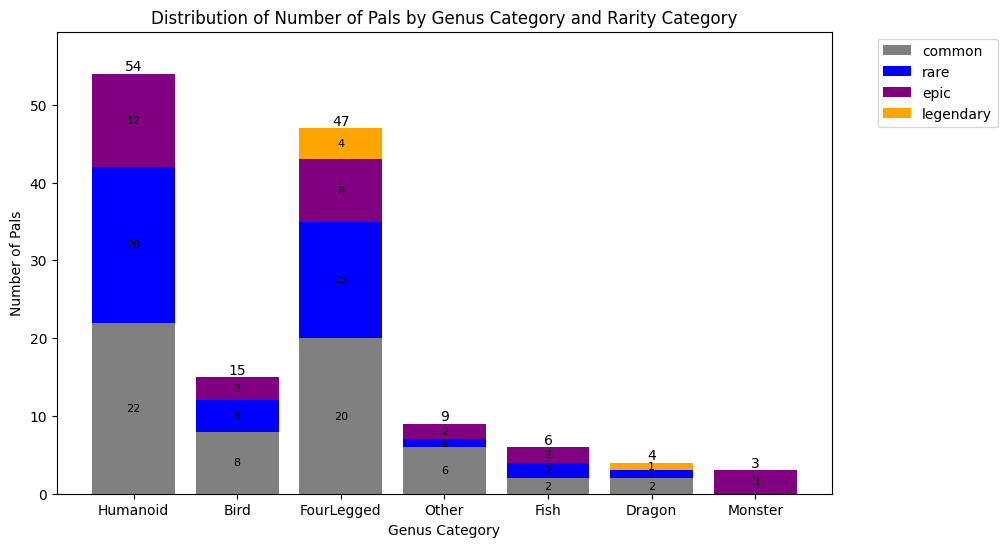

In [57]:
# Function to plot the distribution of pals genius category by if theyr are common, rare, epic or legendary
def genus_category_distribution_rarity_bar():
    # Importing the dataset
    dataset = import_data()

    # Extracting genus_category and rarity from the dataset
    genus_category = [row[1] for row in dataset]  # assuming genus_category is in row[1]
    rarity = [row[2] for row in dataset]  # assuming rarity is in row[2]

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in rarity:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Creating a dictionary to count the frequency of each genus category for each rarity category
    genus_category_freq = {}
    for i in range(len(genus_category)):
        category = genus_category[i]
        rarity_category = rarity_categories[i]
        if category not in genus_category_freq:
            genus_category_freq[category] = {}
        if rarity_category in genus_category_freq[category]:
            genus_category_freq[category][rarity_category] += 1
        else:
            genus_category_freq[category][rarity_category] = 1

    # Defining color gradient for rarity category
    colors = {'common': 'gray', 'rare': 'blue', 'epic': 'purple', 'legendary': 'orange'}

    # Ordering the categories and rarity categories in the desired order
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']
    rarity_order = ['common', 'rare', 'epic', 'legendary']

    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(categories_order))
    for rarity_category in rarity_order:
        values = [genus_category_freq[category].get(rarity_category, 0) for category in categories_order]
        bars = ax.bar(categories_order, values, bottom=bottom, color=colors[rarity_category])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='black', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(categories_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Genus Category')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Genus Category and Rarity Category')
    ax.legend(rarity_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the functions
genus_category_distribution_rarity_bar()

## Distribution of number of Pals by genus category and element

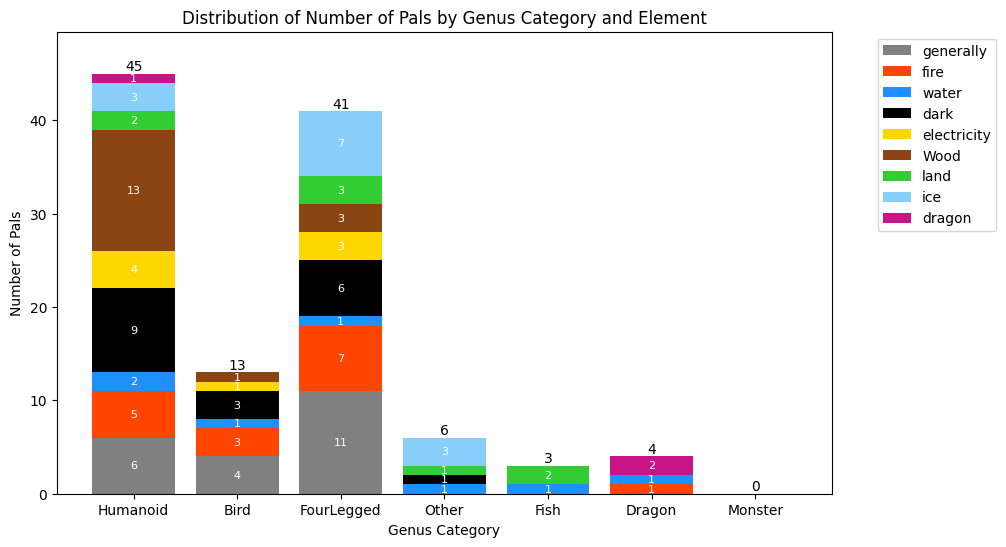

In [81]:
# Function to plot the distribution of pals genius category by element
def genus_category_distribution_single_element_bar():
    # Importing the dataset
    dataset = import_data()

    # Extracting genus_category, element_1 and element_2 from the dataset
    genus_category = [row[1] for row in dataset]  # assuming genus_category is in row[1]
    element_1 = [row[3] for row in dataset]  # assuming element_1 is in row[3]
    element_2 = [row[4] for row in dataset]  # assuming element_2 is in row[4]

    # Creating a dictionary to count the frequency of each genus category for each element
    genus_category_freq = {}
    for i in range(len(genus_category)):
        category = genus_category[i]
        if element_2[i] is None:  # Only consider pals with a single element
            element = element_1[i]
            if category not in genus_category_freq:
                genus_category_freq[category] = {}
            if element in genus_category_freq[category]:
                genus_category_freq[category][element] += 1
            else:
                genus_category_freq[category][element] = 1

    # Defining color gradient for elements
    colors = {'generally': 'gray', 'fire': '#ff4500', 'water': '#1e90ff', 'dark': 'black', 'electricity': '#ffd700', 'Wood': '#8B4513', 'land': '#32CD32', 'ice': '#87CEFA', 'dragon': '#C71585'}
    # Ordering the categories and elements in the desired order
    elements_order = ['generally', 'fire', 'water', 'dark', 'electricity', 'Wood', 'land', 'ice', 'dragon']
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']
    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(categories_order))
    for element in elements_order:
        values = [genus_category_freq[category].get(element, 0) if category in genus_category_freq else 0 for category in categories_order]
        bars = ax.bar(categories_order, values, bottom=bottom, color=colors[element])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='white', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(categories_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Genus Category')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Genus Category and Element')
    ax.legend(elements_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the function
genus_category_distribution_single_element_bar()

## Distribution of number of Pals by genus category and combined element

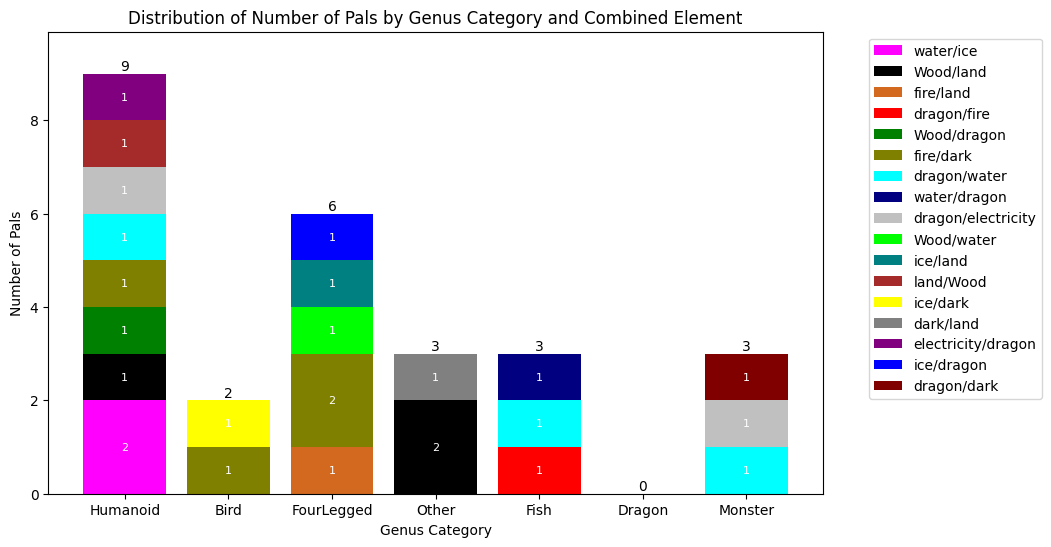

In [59]:
# Function to plot the distribution of pals genius category by combiend element
def genus_category_distribution_double_element_combined_bar():
    # Importing the dataset
    dataset = import_data()

    # Extracting genus_category, element_1 and element_2 from the dataset
    genus_category = [row[1] for row in dataset]  # assuming genus_category is in row[1]
    element_1 = [row[3] for row in dataset]  # assuming element_1 is in row[3]
    element_2 = [row[4] for row in dataset]  # assuming element_2 is in row[4]

    # Creating a dictionary to count the frequency of each genus category for each combined element
    genus_category_freq = {}
    unique_combined_elements = set()  # To store unique combined elements
    for i in range(len(genus_category)):
        category = genus_category[i]
        if element_2[i] is not None:  # Only consider pals with two elements
            combined_element = element_1[i] + "/" + element_2[i]
            unique_combined_elements.add(combined_element)  # Add the combined element to the set
            if category not in genus_category_freq:
                genus_category_freq[category] = {}
            if combined_element in genus_category_freq[category]:
                genus_category_freq[category][combined_element] += 1
            else:
                genus_category_freq[category][combined_element] = 1

    # Defining color for each combined element
    colors = {
        'dragon/dark': '#800000',  # dark red for dark dragon
        'Wood/dragon': '#008000',  # green for wood dragon
        'water/dragon': '#000080',  # blue for water dragon
        'fire/dark': '#808000',  # brown for dark fire
        'electricity/dragon': '#800080',  # purple for electric dragon
        'ice/land': '#008080',  # teal for land ice
        'dark/land': '#808080',  # gray for dark land
        'dragon/electricity': '#C0C0C0',  # light gray for electric dragon
        'dragon/fire': '#FF0000',  # red for fire dragon
        'Wood/water': '#00FF00',  # bright green for water wood
        'ice/dragon': '#0000FF',  # blue for ice dragon
        'ice/dark': '#FFFF00',  # yellow for dark ice
        'water/ice': '#FF00FF',  # pink for ice water
        'dragon/water': '#00FFFF',  # cyan for water dragon
        'Wood/land': '#000000',  # black for land wood
        'land/Wood': '#A52A2A',  # brown for wood land
        'fire/land': '#D2691E'  # chocolate for land fire
    }
    # Ordering the categories and combined elements in the desired order
    combined_elements_order = list(unique_combined_elements)  # Use the unique combined elements for the order
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']
    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(categories_order))
    for combined_element in combined_elements_order:
        values = [genus_category_freq[category].get(combined_element, 0) if category in genus_category_freq else 0 for category in categories_order]
        bars = ax.bar(categories_order, values, bottom=bottom, color=colors[combined_element])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='white', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(categories_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Genus Category')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Genus Category and Combined Element')
    ax.legend(combined_elements_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()
# Calling the function
genus_category_distribution_double_element_combined_bar()

# About Pals HP and combat attribute

## Percentage distribution of number of Pals by HP

columns names :  ['hp']
Query : SELECT hp FROM `pals`


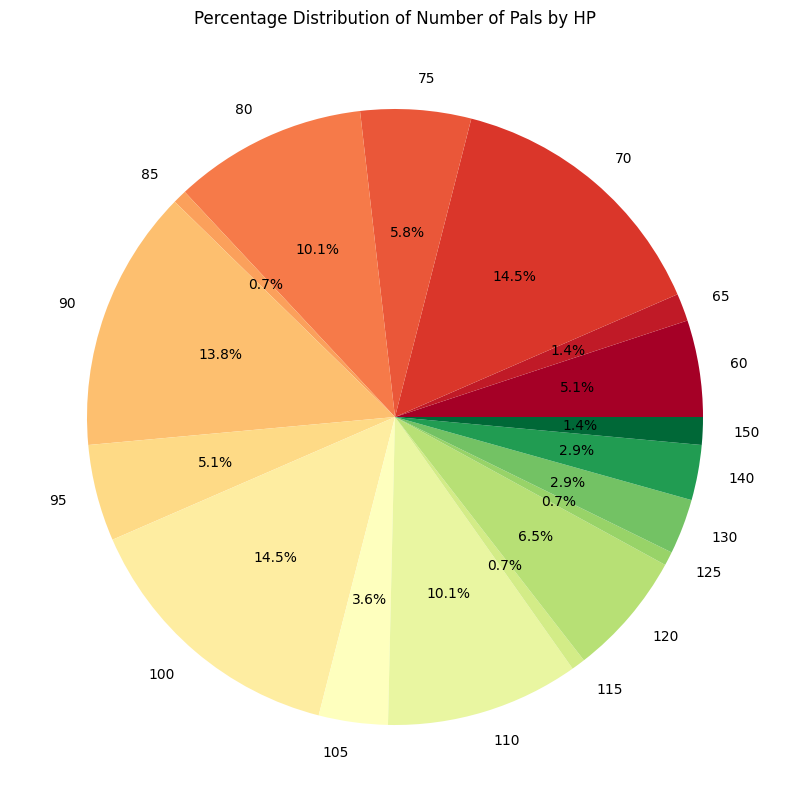

In [60]:
# Function to plot the distribution of pals by HP in a pie chart
def hp_distribution_pie():


    # Importing the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["hp"])

    # Extracting hp from the dataset
    hp = dataset["hp"]

    # Counting the number of pals for each unique HP value
    hp_counts = hp.value_counts().sort_index()

    # Normalizing HP values to 0-1 range for color mapping
    norm = mcolors.Normalize(vmin=hp_counts.index.min(), vmax=hp_counts.index.max())

    # Creating a color map
    cmap = plt.get_cmap('RdYlGn')

    # Creating the pie chart with color gradient
    plt.pie(hp_counts, labels=hp_counts.index, colors=[cmap(norm(value)) for value in hp_counts.index], autopct='%1.1f%%')

    # change fig size
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    # Adding a title
    plt.title('Percentage Distribution of Number of Pals by HP')
    plt.show()

# Calling the function
hp_distribution_pie()


## Distribution of number of Pals by HP

columns names :  ['hp']
Query : SELECT hp FROM `pals`


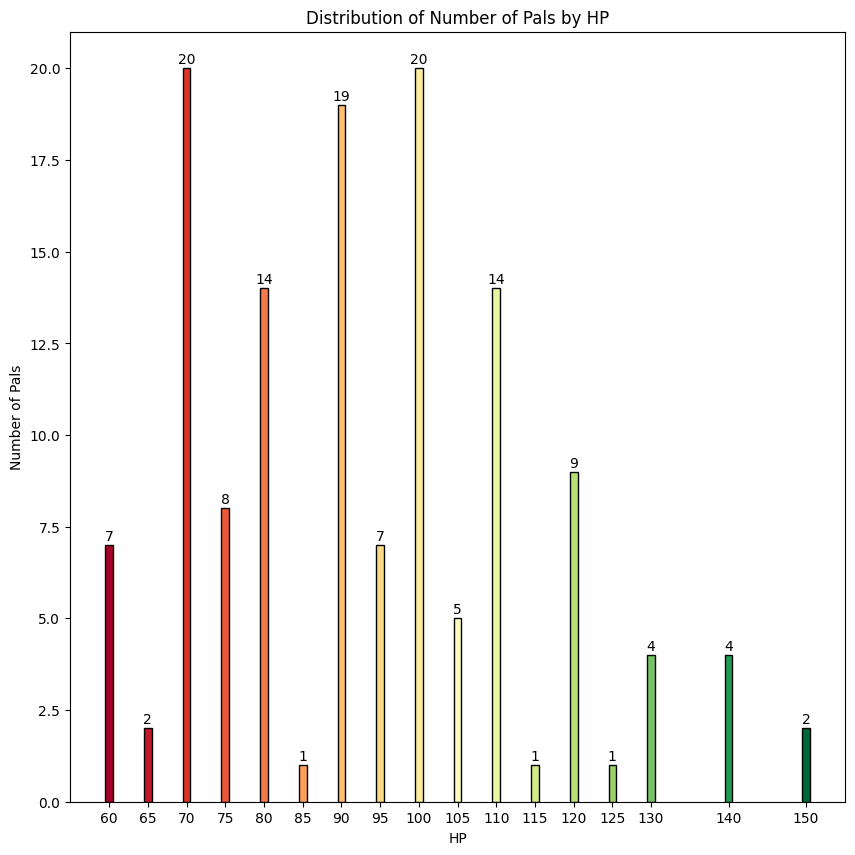

In [61]:
# Function to plot the distribution of number of pals by HP in a bar chart
def hp_distribution_bar():


    # Importing the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["hp"])

    # Extracting hp from the dataset
    hp = dataset["hp"]

    # Counting the number of pals for each unique HP value
    hp_counts = hp.value_counts().sort_index()

    # Creating a larger figure
    plt.figure(figsize=(10, 10))  # Increase the size of the figure

    # Normalizing HP values to 0-1 range for color mapping
    norm = mcolors.Normalize(vmin=hp_counts.index.min(), vmax=hp_counts.index.max())

    # Creating a color map
    cmap = plt.get_cmap('RdYlGn')

    # Creating the bar plot with wider bars and color gradient
    bars = plt.bar(hp_counts.index, hp_counts, color=[cmap(norm(value)) for value in hp_counts.index], edgecolor='black', width=1.0)

    plt.title('Distribution of Number of Pals by HP')
    plt.xlabel('HP')
    plt.ylabel('Number of Pals')

    # Setting the xticks to the HP values
    plt.xticks(hp_counts.index)

    # Adding the text above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

    plt.show()

# Calling the function
hp_distribution_bar()

## Distribution of number of Pals by HP and rarity

columns names :  ['hp', 'rarity']
Query : SELECT hp, rarity FROM `pals`


<Figure size 2000x2000 with 0 Axes>

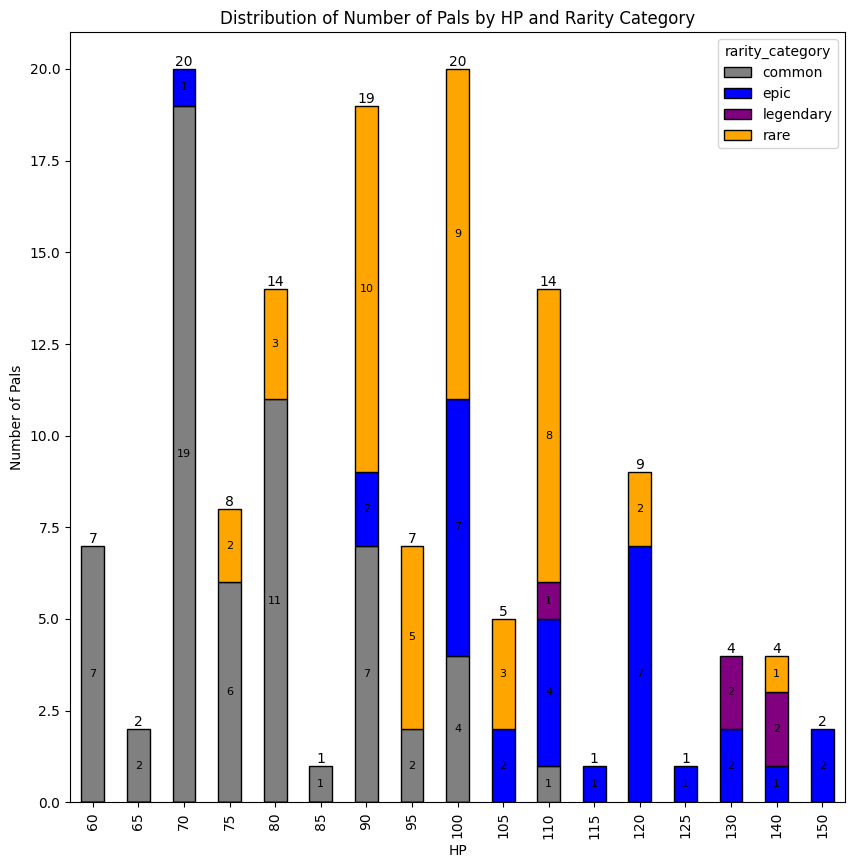

In [62]:
# Function to plot the distribution of number of pals by HP and rarity category in a bar chart
def hp_rarity_distribution_bar():


    # Importing the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["hp", "rarity"])

    # Extracting hp and rarity from the dataset
    hp = dataset["hp"]
    rarity = dataset["rarity"]

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in rarity:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Adding the rarity categories to the dataset
    dataset['rarity_category'] = rarity_categories


    # Counting the number of pals for each unique HP value for each rarity category
    hp_rarity_counts = dataset.groupby(['hp', 'rarity_category']).size().unstack(fill_value=0)

    # Creating a larger figure
    plt.figure(figsize=(20, 20))  # Increase the size of the figure

    # Creating the bar plot with wider bars and color gradient
    bars = hp_rarity_counts.plot(kind='bar', stacked=True, color=['gray', 'blue', 'purple', 'orange'], edgecolor='black', width=0.5)

    # Adding the text inside and above each bar
    for i, (hp, row) in enumerate(hp_rarity_counts.iterrows()):
        y_offset = 0
        for j, col in enumerate(row):
            value = int(col)
            if value != 0:
                plt.text(i, y_offset + value/2, value, ha='center', va='center', color='black', fontsize=8)
            y_offset += value
        plt.text(i, y_offset, y_offset, ha='center', va='bottom', color='black', fontsize=10)

    # Change fig size
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    plt.title('Distribution of Number of Pals by HP and Rarity Category')
    plt.xlabel('HP')
    plt.ylabel('Number of Pals')
    plt.show()

# Calling the function
hp_rarity_distribution_bar()

## Distribution of number of Pals by HP and genus category 

columns names :  ['hp', 'genus_category']
Query : SELECT hp, genus_category FROM `pals`


<Figure size 2000x2000 with 0 Axes>

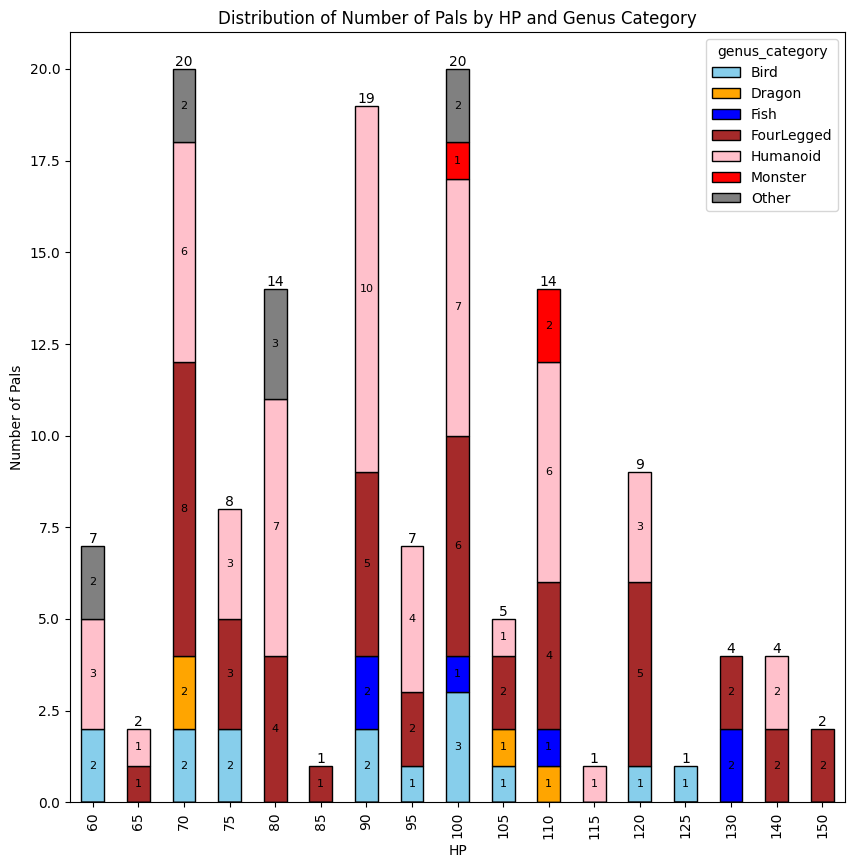

In [63]:
def hp_genus_distribution_bar():

    # Importing the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["hp", "genus_category"])

    # Extracting hp and genus_category from the dataset
    hp = dataset["hp"]
    genus_category = dataset["genus_category"]

    # Counting the number of pals for each unique HP value for each genus category
    hp_genus_counts = dataset.groupby(['hp', 'genus_category']).size().unstack(fill_value=0)

    # Defining color gradient for genus category
    colors = {'Humanoid': 'pink', 'Bird': 'skyblue', 'FourLegged': 'brown', 'Other': 'gray', 'Fish': 'blue', 'Dragon': 'orange', 'Monster': 'red'}

    # Creating a larger figure
    plt.figure(figsize=(20, 20))  # Increase the size of the figure

    # Creating the bar plot with wider bars and color gradient
    bars = hp_genus_counts.plot(kind='bar', stacked=True, color=[colors[genus] for genus in hp_genus_counts.columns], edgecolor='black', width=0.5)

    # Adding the text inside and above each bar
    for i, (hp, row) in enumerate(hp_genus_counts.iterrows()):
        y_offset = 0
        for j, col in enumerate(row):
            value = int(col)
            if value != 0:
                plt.text(i, y_offset + value/2, value, ha='center', va='center', color='black', fontsize=8)
            y_offset += value
        plt.text(i, y_offset, y_offset, ha='center', va='bottom', color='black', fontsize=10)

    # Change fig size
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    plt.title('Distribution of Number of Pals by HP and Genus Category')
    plt.xlabel('HP')
    plt.ylabel('Number of Pals')
    plt.show()

# Calling the function
hp_genus_distribution_bar()



## HP and combat attribute relationships

columns names :  ['hp', 'melee_attack', 'remote_attack', 'defense', 'support']
Query : SELECT hp, melee_attack, remote_attack, defense, support FROM `pals`


<Figure size 2000x2000 with 0 Axes>

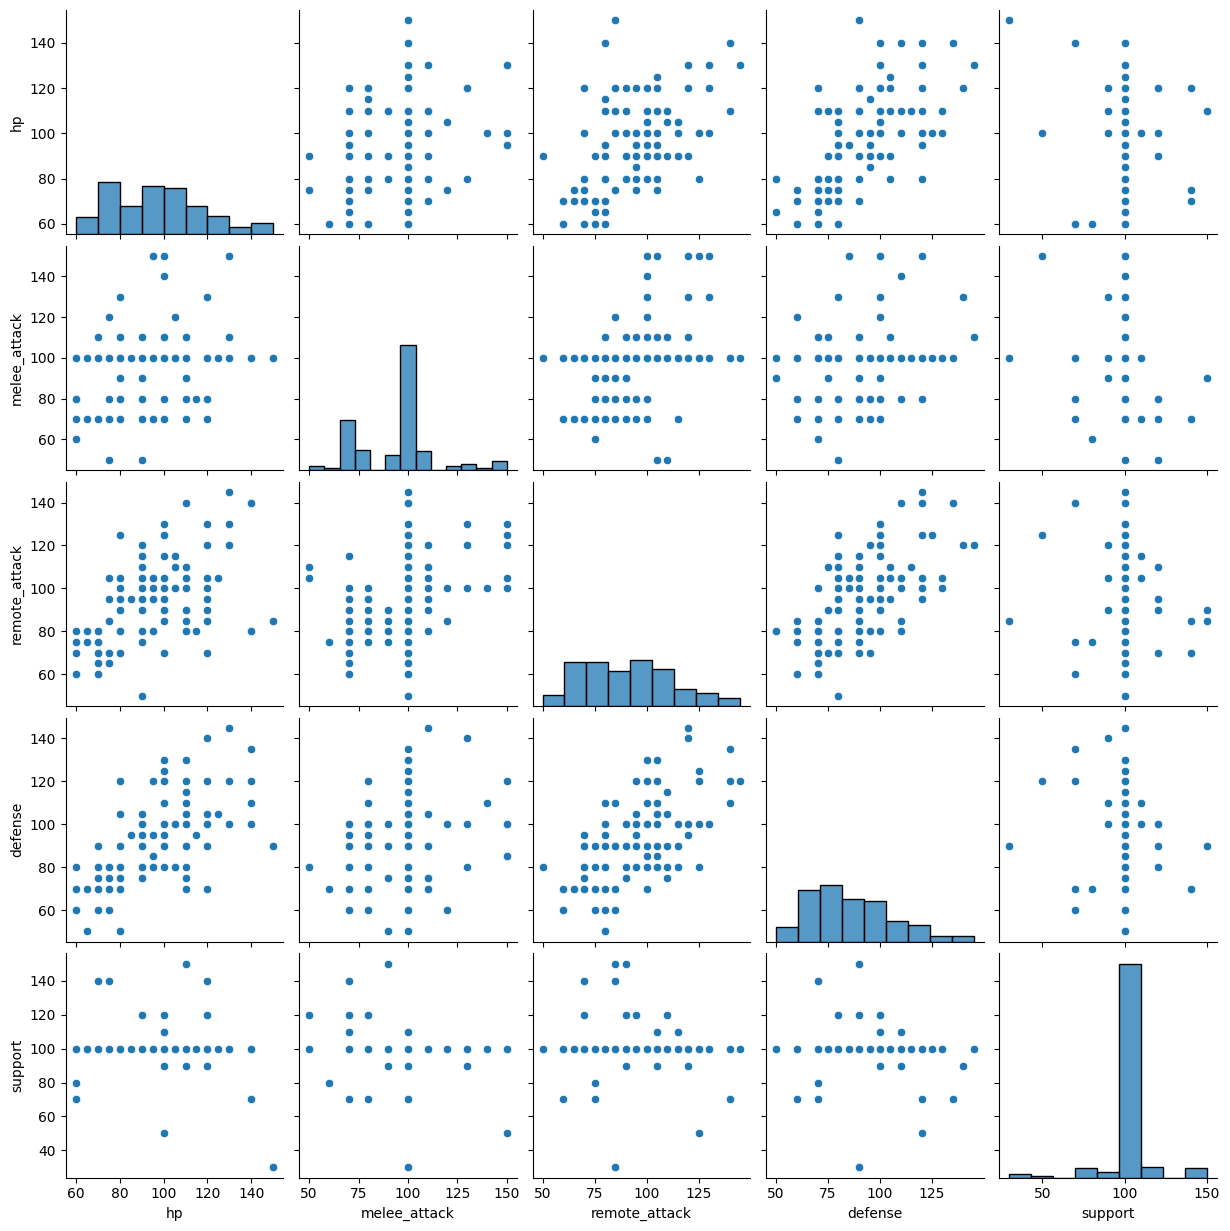

In [64]:
# Function to plot the raletionship between HP and combat attributes
def plot_hp_combat_attribute_relationships():

    # Importing the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["hp", "melee_attack", "remote_attack", "defense", "support"])

    # Creating a larger figure
    plt.figure(figsize=(20, 20))  # Increase the size of the figure

    # Creating scatter plots for each pair of variables
    sns.pairplot(dataset)

    plt.show()

# Calling the function
plot_hp_combat_attribute_relationships()


## HP and combat attribute correlation

columns names :  ['hp', 'melee_attack', 'remote_attack', 'defense', 'support']
Query : SELECT hp, melee_attack, remote_attack, defense, support FROM `pals`


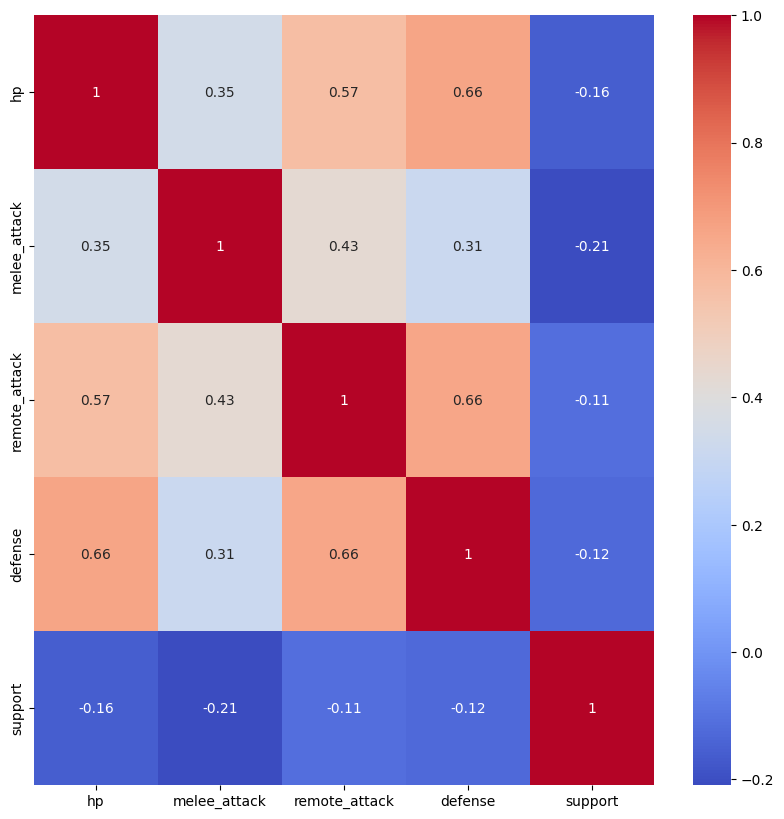

In [65]:
# Function to plot the correlation matrix of HP and combat attributes
def plot_hp_combat_attribute_correlation():

    # Importing the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["hp", "melee_attack", "remote_attack", "defense", "support"])

    # Calculating the correlation matrix
    corr = dataset.corr()

    # Creating a larger figure
    plt.figure(figsize=(10, 10))  # Increase the size of the figure

    # Creating a heatmap of the correlation matrix
    sns.heatmap(corr, annot=True, cmap='coolwarm')

    plt.show()

# Calling the function
plot_hp_combat_attribute_correlation()


# About pals rarity

## Percentage distribution of number of Pals by rarity category

columns names :  ['rarity']
Query : SELECT rarity FROM `pals`


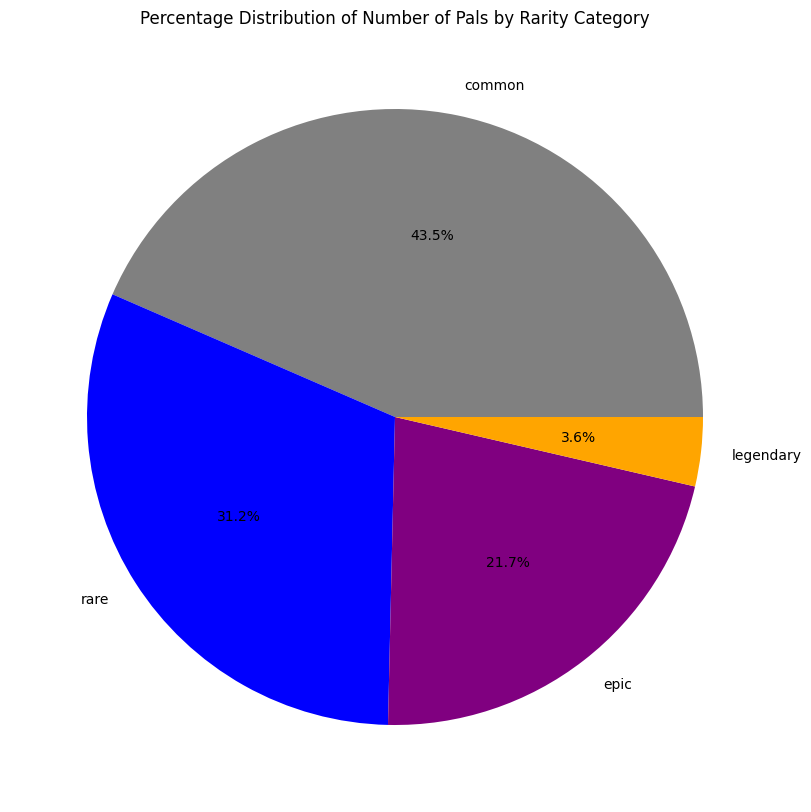

In [67]:
# Function to plot the percentage distribution of rarity categories
def rarity_distribution_pie():

    # Importing the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["rarity"])

    # Extracting rarity from the dataset
    rarity = dataset["rarity"]

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in rarity:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Counting the number of pals for each rarity category
    rarity_counts = pd.Series(rarity_categories).value_counts()

    # Defining color gradient for rarity category
    colors = {'common': 'gray', 'rare': 'blue', 'epic': 'purple', 'legendary': 'orange'}

    # Creating a larger figure
    plt.figure(figsize=(10, 10))

    # Creating the pie chart with color gradient
    plt.pie(rarity_counts, labels=rarity_counts.index, colors=[colors[category] for category in rarity_counts.index], autopct='%1.1f%%')

    plt.title('Percentage Distribution of Number of Pals by Rarity Category')
    plt.show()

# Calling the function
rarity_distribution_pie()

## How Pals's rarity affects its base attribute values

columns names :  ['rarity', 'hp', 'melee_attack', 'remote_attack', 'defense', 'support']
Query : SELECT rarity, hp, melee_attack, remote_attack, defense, support FROM `pals`


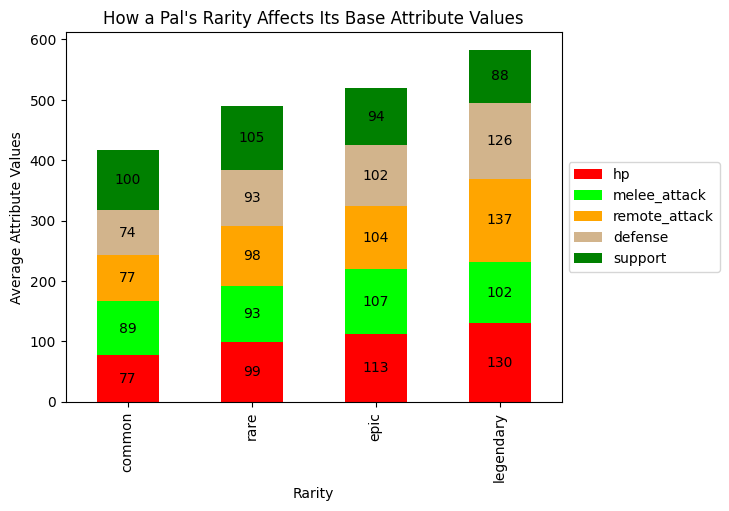

In [132]:
# Function to 
def plot_rarity_vs_attributes():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["rarity", "hp", "melee_attack", "remote_attack", "defense", "support"])

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in dataset['rarity']:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Adding the rarity categories to the dataset
    dataset['rarity_category'] = rarity_categories

    # Calculate the average of each attribute for each rarity category
    avg_attributes_by_rarity = dataset.groupby('rarity_category')[["hp", "melee_attack", "remote_attack", "defense", "support"]].mean()

    # Order the data by rarity category
    ordered_categories = ['common', 'rare', 'epic', 'legendary']
    avg_attributes_by_rarity = avg_attributes_by_rarity.reindex(ordered_categories)

    # Create a stacked bar chart with color coding
    ax = avg_attributes_by_rarity.plot(kind='bar', stacked=True, color={"hp": "red", "melee_attack": "lime", "remote_attack": "orange", "defense": "tan", "support": "green"})

    # Add attribute values to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
        
    # Move the legend to the right side of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title('How a Pal\'s Rarity Affects Its Base Attribute Values')
    plt.xlabel('Rarity')
    plt.ylabel('Average Attribute Values')

    plt.show()

# Call the function
plot_rarity_vs_attributes()

# About Pals food intake

## Percentage of alimentary distribution of Pals

columns names :  ['food_intake']
Query : SELECT food_intake FROM `job-skill`


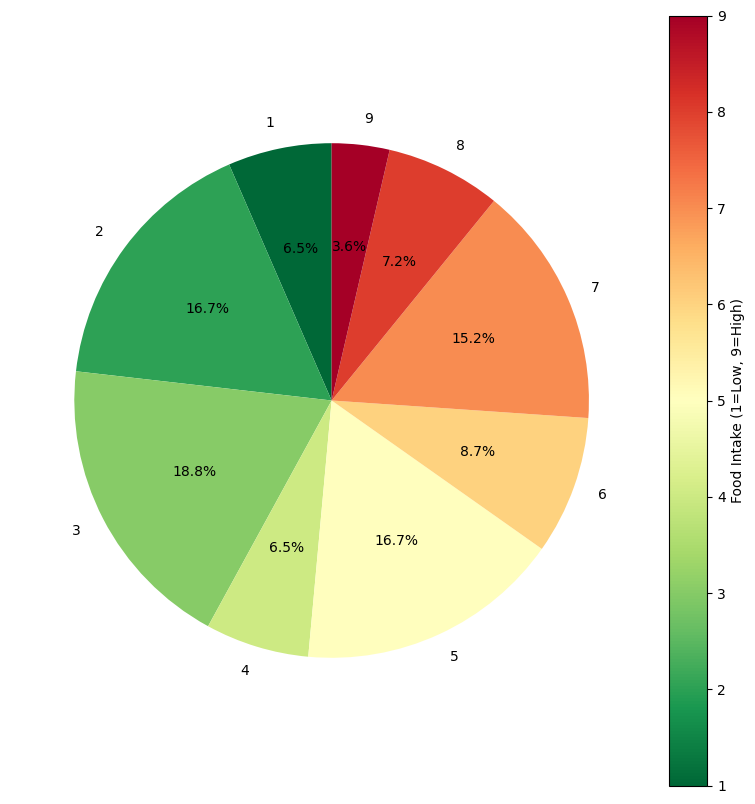

In [98]:
# Function to plot the alimentary distribution of pals into a pie chart
def alimentary_distribution_pie():

    # Importing the dataset
    dataset = db.get_df_from_select(table_name="job-skill", columns_names=["food_intake"])

    # Extracting food_intake from the dataset
    food_intake = dataset["food_intake"]

    # Counting the number of pals for each food intake value
    food_intake_counts = food_intake.value_counts().sort_index()

    # Defining color gradient for food intake
    cmap = plt.get_cmap('RdYlGn_r')  # 'RdYlGn_r' is a colormap that goes from red to green
    colors = [cmap(i) for i in np.linspace(0, 1, len(food_intake_counts))]

    # Creating a larger figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Creating the pie chart
    wedges, texts, autotexts = ax.pie(food_intake_counts, labels=food_intake_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

    # Adding a color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=9))
    fig.colorbar(sm, ax=ax, orientation='vertical', label='Food Intake (1=Low, 9=High)', pad=0.02)

    plt.show()

# Calling the function
alimentary_distribution_pie()

## Alimentary distribution  of Pals

columns names :  ['food_intake']
Query : SELECT food_intake FROM `job-skill`


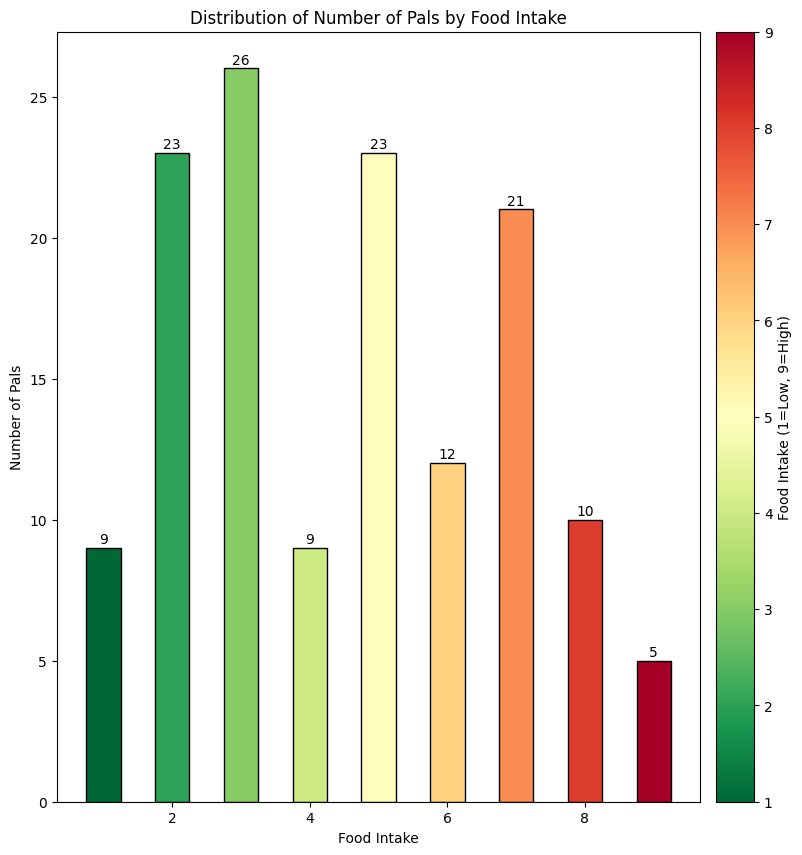

In [99]:
# Function to plot the alimentary distribution of pals into a bar chart
def alimentary_distribution_bar():

    # Importing the dataset
    dataset = db.get_df_from_select(table_name="job-skill", columns_names=["food_intake"])

    # Extracting food_intake from the dataset
    food_intake = dataset["food_intake"]

    # Counting the number of pals for each food intake value
    food_intake_counts = food_intake.value_counts().sort_index()

    # Defining color gradient for food intake
    cmap = plt.get_cmap('RdYlGn_r')  # 'RdYlGn_r' is a colormap that goes from red to green
    colors = [cmap(i) for i in np.linspace(0, 1, len(food_intake_counts))]

    # Creating a larger figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Creating the bar plot
    bars = ax.bar(food_intake_counts.index, food_intake_counts, color=colors, edgecolor='black', width=0.5)

    # Adding the text above each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

    # Adding a color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=9))
    fig.colorbar(sm, ax=ax, orientation='vertical', label='Food Intake (1=Low, 9=High)', pad=0.02)

    plt.title('Distribution of Number of Pals by Food Intake')
    plt.xlabel('Food Intake')
    plt.ylabel('Number of Pals')
    plt.show()

# Calling the function
alimentary_distribution_bar()

# About the production of useful products by pals

TO DO !!!

# About the fighting power of Pals

## Fighting power of Pals distribution 

columns names :  ['hp', 'melee_attack', 'remote_attack', 'defense', 'support']
Query : SELECT hp, melee_attack, remote_attack, defense, support FROM `pals`


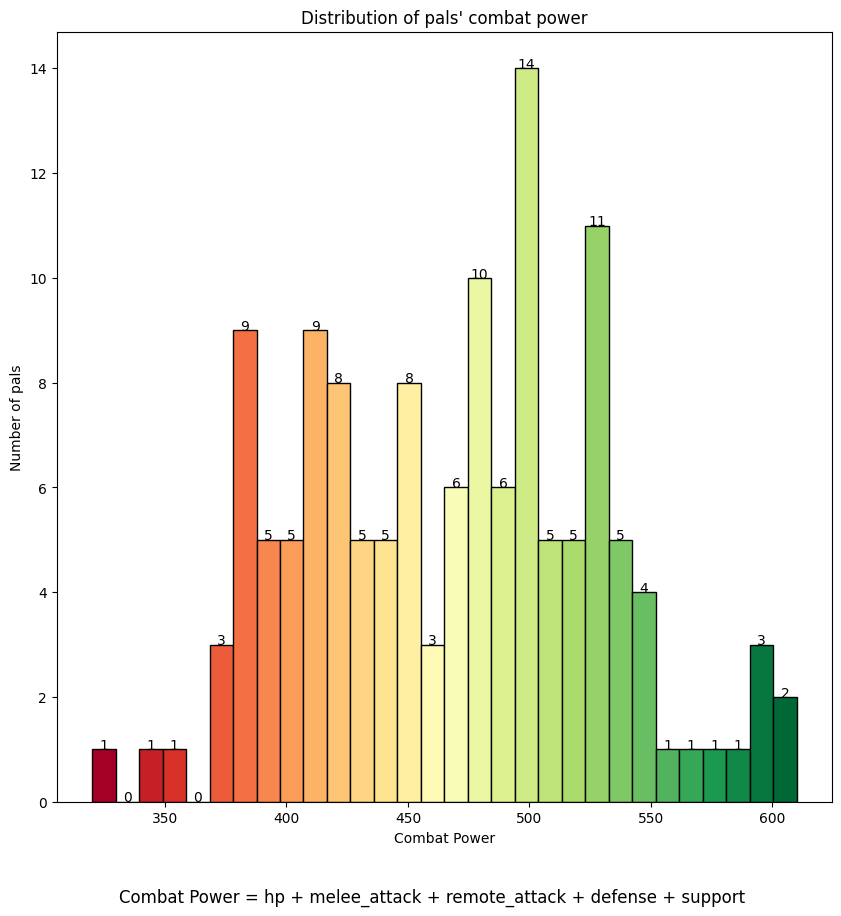

In [119]:
# Function to plot the fighting power distribution of pals into a pie chart
def plot_combat_power_distribution():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["hp", "melee_attack", "remote_attack", "defense", "support"])

    # Calculate combat power
    dataset['combat_power'] = dataset.sum(axis=1)

    # Create a larger figure
    plt.figure(figsize=(10, 10))

    # Create a histogram of the combat power distribution
    n, bins, patches = plt.hist(dataset['combat_power'], bins=30, edgecolor='black')

    # Add the actual values above each bar
    for i in range(len(patches)):
        plt.text(patches[i].get_x()+patches[i].get_width()/2., n[i], str(int(n[i])), ha='center')

    # Create a color gradient from green to red based on combat power
    fracs = bins[:-1] / bins[:-1].max()
    norm = mcolors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.RdYlGn(norm(thisfrac))
        thispatch.set_facecolor(color)

    # Add combat power formula
    combat_power_formula = "Combat Power = hp + melee_attack + remote_attack + defense + support"
    plt.figtext(0.5, 0.01, combat_power_formula, wrap=True, horizontalalignment='center', fontsize=12)

    plt.title('Distribution of pals\' combat power')
    plt.xlabel('Combat Power')
    plt.ylabel('Number of pals')

    plt.show()

# Call the function
plot_combat_power_distribution()



## Top 10 most powerfull Pals 

columns names :  ['name', 'hp', 'melee_attack', 'remote_attack', 'defense', 'support']
Query : SELECT name, hp, melee_attack, remote_attack, defense, support FROM `pals`


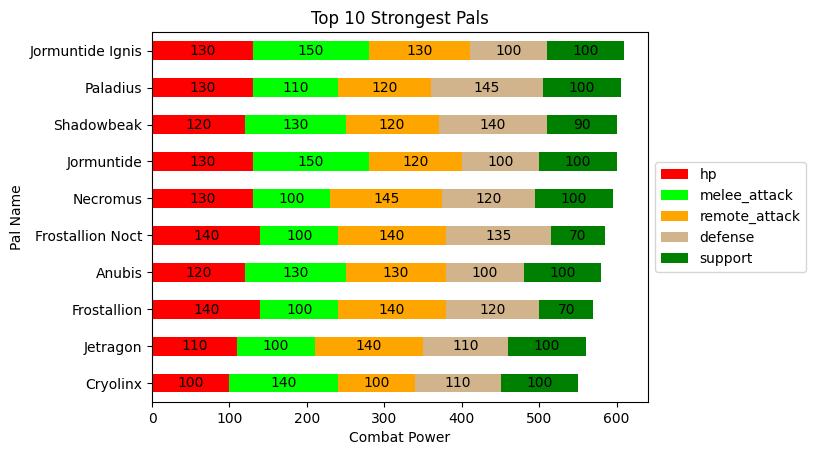

In [125]:
# Function to plot the top 10 strongest pals in a horizontal stacked bar chart
def plot_top10_pals():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["name", "hp", "melee_attack", "remote_attack", "defense", "support"])

    # Calculate combat power
    dataset['combat_power'] = dataset[["hp", "melee_attack", "remote_attack", "defense", "support"]].sum(axis=1)

    # Sort the dataset by combat power and take the top 10
    top10_pals = dataset.sort_values(by='combat_power', ascending=True).tail(10)

    # Create a horizontal stacked bar chart
    ax = top10_pals.set_index('name')[["hp", "melee_attack", "remote_attack", "defense", "support"]].plot(kind='barh', stacked=True, 
        color={"hp": "red", "melee_attack": "lime", "remote_attack": "orange", "defense": "tan", "support": "green"})

    # Add the values for each attribute in the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(width), 
                horizontalalignment='center', 
                verticalalignment='center')

    # Move the legend to the right side of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.title('Top 10 Strongest Pals')
    plt.xlabel('Combat Power')
    plt.ylabel('Pal Name')

    plt.show()

# Call the function
plot_top10_pals()

## Average rarity of Pals with highest attack power

columns names :  ['rarity', 'melee_attack', 'remote_attack']
Query : SELECT rarity, melee_attack, remote_attack FROM `pals`


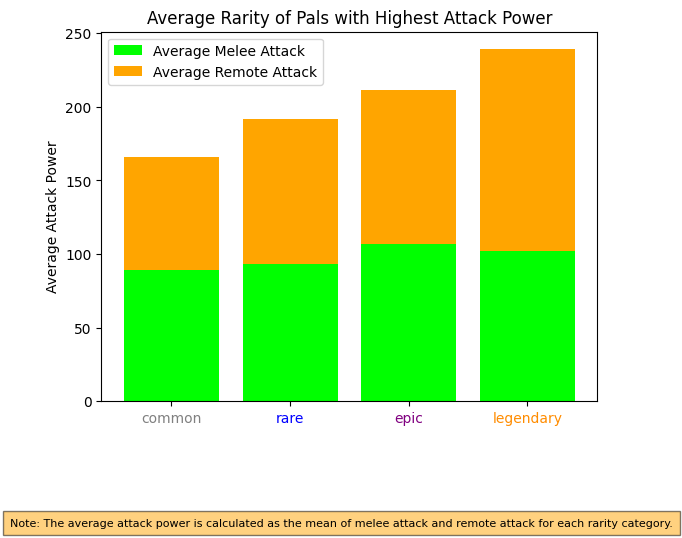

In [148]:
# Function to plot the average rarity of pals with the highest attack power
def plot_avg_rarity_of_high_attack_pals():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["rarity", "melee_attack", "remote_attack"])

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in dataset['rarity']:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Adding the rarity categories to the dataset
    dataset['rarity_category'] = rarity_categories

    # Group by rarity category and calculate average melee attack and average remote attack
    avg_melee_attack_by_rarity = dataset.groupby('rarity_category')['melee_attack'].mean()
    avg_remote_attack_by_rarity = dataset.groupby('rarity_category')['remote_attack'].mean()

    # Order the data by rarity category
    ordered_categories = ['common', 'rare', 'epic', 'legendary']
    avg_melee_attack_by_rarity = avg_melee_attack_by_rarity.reindex(ordered_categories)
    avg_remote_attack_by_rarity = avg_remote_attack_by_rarity.reindex(ordered_categories)

    # Define colors for each rarity category
    rarity_colors = ['gray', 'blue', 'purple', '#FF8C00']

    # Plot
    plt.bar(ordered_categories, avg_melee_attack_by_rarity, color='lime', label='Average Melee Attack')
    plt.bar(ordered_categories, avg_remote_attack_by_rarity, bottom=avg_melee_attack_by_rarity, color='orange', label='Average Remote Attack')
    plt.title('Average Rarity of Pals with Highest Attack Power')
    plt.ylabel('Average Attack Power')
    plt.legend()

    # Add annotation
    plt.figtext(0.5, -0.15, "Note: The average attack power is calculated as the mean of melee attack and remote attack for each rarity category.", ha="center", fontsize=8, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    # Change x-axis labels color
    ax = plt.gca()
    ax.set_xticks(range(len(ordered_categories)))
    ax.set_xticklabels(ordered_categories)
    for i, tick in enumerate(ax.get_xticklabels()):
        tick.set_color(rarity_colors[i])

    plt.show()

# Call the function
plot_avg_rarity_of_high_attack_pals()

## Pal size vs combat performance

columns names :  ['name', 'hp', 'melee_attack', 'remote_attack', 'defense', 'support', 'volume_size']
Query : SELECT name, hp, melee_attack, remote_attack, defense, support, volume_size FROM `pals`


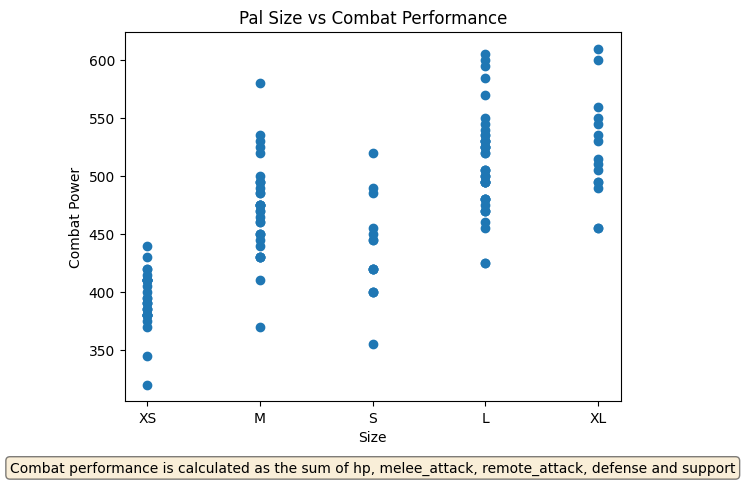

In [162]:
# Function to plot pal size vs combat performance 
def plot_size_vs_performance():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["name", "hp", "melee_attack", "remote_attack", "defense", "support", "volume_size"])

    # Calculate combat power
    dataset['combat_power'] = dataset[["hp", "melee_attack", "remote_attack", "defense", "support"]].sum(axis=1)

    # Define the order
    size_order = ['XS', 'S', 'M', 'L', 'XL']

    # Convert 'volume_size' to a categorical type with the specified order
    dataset['volume_size'] = pd.Categorical(dataset['volume_size'], categories=size_order, ordered=True)

    # Create a scatter plot
    plt.scatter(dataset['volume_size'], dataset['combat_power'])

    plt.title('Pal Size vs Combat Performance')
    plt.xlabel('Size')
    plt.ylabel('Combat Power')
    
    # Add an annotation
    plt.annotate('Combat performance is calculated as the sum of hp, melee_attack, remote_attack, defense and support',
                 xy=(0.5, -0.18), xycoords='axes fraction',
                 horizontalalignment='center', verticalalignment='center',
                 bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

    plt.show()

# Call the function
plot_size_vs_performance()

columns names :  ['name', 'hp', 'melee_attack', 'remote_attack', 'defense', 'support', 'volume_size']
Query : SELECT name, hp, melee_attack, remote_attack, defense, support, volume_size FROM `pals`


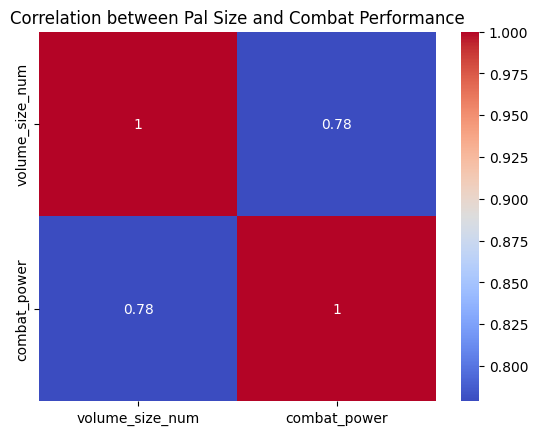

In [171]:

def plot_size_vs_performance():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["name", "hp", "melee_attack", "remote_attack", "defense", "support", "volume_size"])

    # Calculate combat power
    dataset['combat_power'] = dataset[["hp", "melee_attack", "remote_attack", "defense", "support"]].sum(axis=1)

    # Define the order
    size_order = ['XS', 'S', 'M', 'L', 'XL']

    # Convert 'volume_size' to a categorical type with the specified order
    dataset['volume_size'] = pd.Categorical(dataset['volume_size'], categories=size_order, ordered=True)

    # Convert 'volume_size' to numerical values for correlation calculation
    dataset['volume_size_num'] = dataset['volume_size'].cat.codes

    # Calculate the correlation matrix
    correlation_matrix = dataset[['volume_size_num', 'combat_power']].corr()

    # Create a heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

    plt.title('Correlation between Pal Size and Combat Performance')
    plt.show()

# Call the function
plot_size_vs_performance()

columns names :  ['name', 'hp', 'melee_attack', 'remote_attack', 'defense', 'support', 'volume_size', 'slow_walking_speed', 'walking_speed', 'running_speed']
Query : SELECT name, hp, melee_attack, remote_attack, defense, support, volume_size, slow_walking_speed, walking_speed, running_speed FROM `pals`


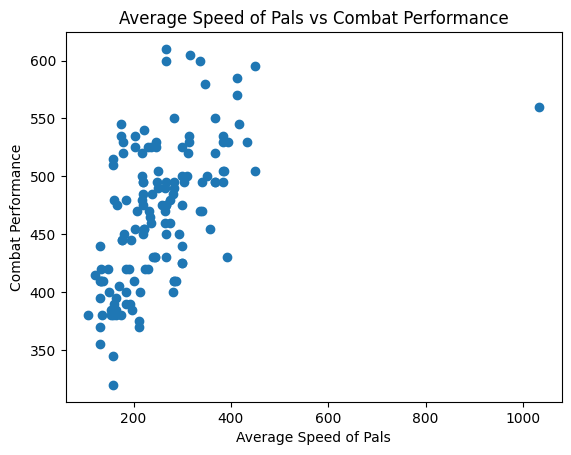

In [164]:
# Function to plot the average speed of pals vs combat performance
def plot_speed_vs_performance():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["name", "hp", "melee_attack", "remote_attack", "defense", "support", "volume_size", "slow_walking_speed", "walking_speed", "running_speed"])

    # Calculate combat power
    dataset['combat_power'] = dataset[["hp", "melee_attack", "remote_attack", "defense", "support"]].sum(axis=1)

    # Calculate average speed
    dataset['average_speed'] = dataset[["slow_walking_speed", "walking_speed", "running_speed"]].mean(axis=1)

    # Create a scatter plot
    plt.scatter(dataset['average_speed'], dataset['combat_power'])

    plt.title('Average Speed of Pals vs Combat Performance')
    plt.xlabel('Average Speed of Pals')
    plt.ylabel('Combat Performance')

    plt.show()

# Call the function
plot_speed_vs_performance()


columns names :  ['name', 'hp', 'melee_attack', 'remote_attack', 'defense', 'support', 'volume_size', 'slow_walking_speed', 'walking_speed', 'running_speed']
Query : SELECT name, hp, melee_attack, remote_attack, defense, support, volume_size, slow_walking_speed, walking_speed, running_speed FROM `pals`


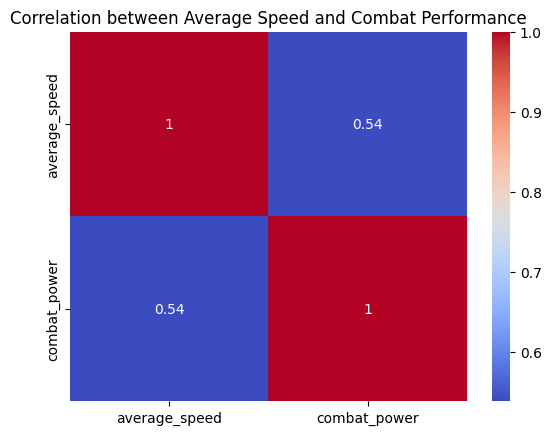

In [168]:
# Function to plot the correlation between average speed and combat performance
def plot_speed_vs_performance_correlation():

    # Import the dataset
    dataset = db.get_df_from_select(table_name="pals", columns_names=["name", "hp", "melee_attack", "remote_attack", "defense", "support", "volume_size", "slow_walking_speed", "walking_speed", "running_speed"])

    # Calculate combat power
    dataset['combat_power'] = dataset[["hp", "melee_attack", "remote_attack", "defense", "support"]].sum(axis=1)

    # Calculate average speed
    dataset['average_speed'] = dataset[["slow_walking_speed", "walking_speed", "running_speed"]].mean(axis=1)

    # Calculate the correlation matrix
    correlation_matrix = dataset[['average_speed', 'combat_power']].corr()

    # Create a heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

    plt.title('Correlation between Average Speed and Combat Performance')
    plt.show()

# Call the function
plot_speed_vs_performance_correlation()

